In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("cars24new.csv")
#data['Price'] = pd.to_numeric(data['Price'])
data.head()

,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,year,month,Company,Model
0,174699,4.0,3686,34854,First,Petrol,MANUAL,RTOAP,NaN,Expired,2010,5,maruti,alto lxi
1,333999,4.2,3686,39541,Second,Petrol,MANUAL,RTOAP,6/8/2021,Comp,2013,7,maruti,wagon r 1.0 vxi
2,353199,4.3,3686,23233,Second,Petrol,MANUAL,RTOAP,28/4/2021,Comp,2014,3,maruti,wagon r 1.0 vxi
3,237899,4.4,3686,27748,First,Petrol,MANUAL,RTOAP,1/1/2022,Comp,2013,11,hyundai,eon d lite plus
4,300699,4.4,3686,12238,Second,Petrol,MANUAL,RTOTS,NaN,Expired,2017,8,hyundai,eon era plus


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           32158 non-null  int64  
 1   Rating          32158 non-null  float64
 2   city            32158 non-null  int64  
 3   Kilometers      32158 non-null  int64  
 4   Owner           32158 non-null  object 
 5   Fuel_Type       32158 non-null  object 
 6   Transmission    29342 non-null  object 
 7   RTO             32158 non-null  object 
 8   Insurance       22965 non-null  object 
 9   Insurance_Type  32156 non-null  object 
 10  year            32158 non-null  int64  
 11  month           32158 non-null  int64  
 12  Company         32158 non-null  object 
 13  Model           32158 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ MB


In [4]:
data.shape

(32158, 14)

In [5]:
data.columns

Index(['Price', 'Rating', 'city', 'Kilometers', 'Owner', 'Fuel_Type',
       'Transmission', 'RTO', 'Insurance', 'Insurance_Type', 'year', 'month',
       'Company', 'Model'],
      dtype='object')

## Missing value Imputation

In [6]:
data.isna().sum()

Price                0
Rating               0
city                 0
Kilometers           0
Owner                0
Fuel_Type            0
Transmission      2816
RTO                  0
Insurance         9193
Insurance_Type       2
year                 0
month                0
Company              0
Model                0
dtype: int64

## Column Transmission has lots of missing value and Insurance_Type has 2 missing value

In [7]:
data.Transmission.unique()

array(['MANUAL', nan, 'AUTOMATIC'], dtype=object)

In [8]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Transmission'] = pd.DataFrame(mode_imputer.fit_transform(data[['Transmission']]))
data['Insurance_Type'] = pd.DataFrame(mode_imputer.fit_transform(data[['Insurance_Type']]))

In [9]:
data.Transmission.unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [10]:
data.isna().sum()

Price                0
Rating               0
city                 0
Kilometers           0
Owner                0
Fuel_Type            0
Transmission         0
RTO                  0
Insurance         9193
Insurance_Type       0
year                 0
month                0
Company              0
Model                0
dtype: int64

### Droping the Insurance Column Because not any good method to impute date

In [11]:
data = data.drop('Insurance',axis=1)

In [12]:
data.head(1)

,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,year,month,Company,Model
0,174699,4.0,3686,34854,First,Petrol,MANUAL,RTOAP,Expired,2010,5,maruti,alto lxi


## Column Insurance_Type

In [13]:
data.Insurance_Type.unique()

array(['Expired', 'Comp', 'Third_party', 'Zero_Dep', 'ZeroDepreciation',
       '3rdParty', 'Comprehensive', 'NotAvailable', 'Normal'],
      dtype=object)

In [14]:
# Replacing duplicate string 
data["Insurance_Type"]=data["Insurance_Type"].str.replace('Comp', 'Comprehensive')
data["Insurance_Type"]=data["Insurance_Type"].str.replace('Zero_Dep', 'ZeroDepreciation')
data["Insurance_Type"]=data["Insurance_Type"].str.replace('3rdParty', 'Third_party')
#df["Insurance_Type"]=data["Insurance_Type"].str.replace('Normal', 'Expired')
data["Insurance_Type"]=data["Insurance_Type"].str.replace('NotAvailable', 'Expired')


In [15]:
data.Insurance_Type.unique()

array(['Expired', 'Comprehensive', 'Third_party', 'ZeroDepreciation',
       'Comprehensiverehensive', 'Normal'], dtype=object)

In [16]:
data["Insurance_Type"]=data["Insurance_Type"].str.replace('Comprehensiverehensive', 'Comprehensive')

In [17]:
data.Insurance_Type.unique()

array(['Expired', 'Comprehensive', 'Third_party', 'ZeroDepreciation',
       'Normal'], dtype=object)

In [18]:
data.Insurance_Type.value_counts()

Comprehensive       11801
Expired              9428
Third_party          6290
ZeroDepreciation     4634
Normal                  5
Name: Insurance_Type, dtype: int64

## Checking how many categories present in every single column

In [19]:
columns = ['Owner','Fuel_Type','Transmission','RTO','Insurance_Type','Company','Model']
for col in columns:
    print(col, ': ', len(data[col].unique()), 'labels')

Owner :  10 labels
Fuel_Type :  6 labels
Transmission :  2 labels
RTO :  86 labels
Insurance_Type :  5 labels
Company :  33 labels
Model :  2671 labels


## Droping RTO and city

In [20]:
data = data.drop(['RTO','city'],axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder

Owner_le = LabelEncoder()
Fuel_Type_le = LabelEncoder()
Transmission_le = LabelEncoder()
Insurance_Type_le = LabelEncoder()
Company_le = LabelEncoder()
Model_le = LabelEncoder()


data['Owner'] = Owner_le.fit_transform(data['Owner'])
data['Fuel_Type'] = Fuel_Type_le.fit_transform(data['Fuel_Type'])
data['Transmission'] = Transmission_le.fit_transform(data['Transmission'])
data['Insurance_Type'] = Insurance_Type_le.fit_transform(data['Insurance_Type'])
data['Company'] = Company_le.fit_transform(data['Company'])
data['Model'] = Model_le.fit_transform(data['Model'])


In [22]:
data.head()

,Price,Rating,Kilometers,Owner,Fuel_Type,Transmission,Insurance_Type,year,month,Company,Model
0,174699,4.0,34854,2,3,1,1,2010,5,18,142
1,333999,4.2,39541,5,3,1,0,2013,7,18,2470
2,353199,4.3,23233,5,3,1,0,2014,3,18,2470
3,237899,4.4,27748,2,3,1,0,2013,11,10,776
4,300699,4.4,12238,5,3,1,1,2017,8,10,780


In [23]:
print("Owner",data['Owner'].unique())
print(Owner_le.inverse_transform(list(data['Owner'].unique())))
print()
print("Fuel_Type:",data['Fuel_Type'].unique())
print(Fuel_Type_le.inverse_transform(list(data['Fuel_Type'].unique())))
print()
print("Transmission", data['Transmission'].unique())
print(Transmission_le.inverse_transform(list(data['Transmission'].unique())))
print()
print("Insurance_TypeInsurance_Type",data['Insurance_Type'].unique())
print(Insurance_Type_le.inverse_transform(list(data['Insurance_Type'].unique())))
print()
print("Company",data['Company'].unique())
print(Company_le.inverse_transform(list(data['Company'].unique())))
print()
print("Model",data['Model'].unique())
print(Model_le.inverse_transform(list(data['Model'].unique())))

Owner [2 5 9 3 7 1 0 6 4 8]
['First ' 'Second ' 'Third ' 'Fourth ' 'Sixth ' 'Fifth ' 'Eighth '
 'Seventh ' 'Ninth ' 'Tenth ']

Fuel_Type: [3 0 5 4 1 2]
['Petrol' 'Diesel' 'Petrol + LPG' 'Petrol + CNG' 'Electric' 'Hybrid']

Transmission [1 0]
['MANUAL' 'AUTOMATIC']

Insurance_TypeInsurance_Type [1 0 3 4 2]
['Expired' 'Comprehensive' 'Third_party' 'ZeroDepreciation' 'Normal']

Company [18 10  9  2  7 26 31 29 17 30  4 21 22 15  5 27 23 20 32 14 19 28  1  0
  3 13 16  6 12 24 25  8 11]
['maruti' 'hyundai' 'honda' 'chevrolet' 'ford' 'renault' 'volkswagen'
 'tata' 'mahindra' 'toyota' 'datsun' 'mitsubishi' 'nissan' 'kia' 'fiat'
 'skoda' 'opel' 'mg' 'volvo' 'jeep' 'mercedes' 'ssangyong' 'bmw' 'audi'
 'daewoo' 'jaguar' 'landrover' 'force' 'isuzu' 'porsche' 'premier'
 'hindustan' 'icml']

Model [ 142 2470  776 ... 2067  227  452]
['alto lxi' 'wagon r 1.0 vxi' 'eon d lite plus' ...
 'scorpio vlx at bs iii' 'baleno rs 1.0' 'ciaz s 1.4']


C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers'>

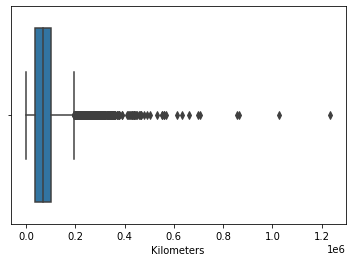

In [24]:
#data['Kilometers'] = pd.to_numeric(data.Kilometers)
sns.boxplot(data.Kilometers)

In [25]:
Q1 = data['Kilometers'].quantile(0.25)
Q3 = data['Kilometers'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
((data['Kilometers'] < (Q1 - 1.5 * IQR)) | (data['Kilometers'] > (Q3 + 1.5 * IQR))).mean()

mask = (data['Kilometers'] < (Q1 - 1.5 * IQR)) | (data['Kilometers'] > (Q3 + 1.5 * IQR))
data[mask] = np.nan

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers'>

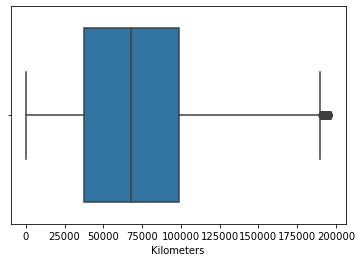

In [27]:
sns.boxplot(data.Kilometers)

In [28]:
data.isnull().mean()

Price             0.026028
Rating            0.026028
Kilometers        0.026028
Owner             0.026028
Fuel_Type         0.026028
Transmission      0.026028
Insurance_Type    0.026028
year              0.026028
month             0.026028
Company           0.026028
Model             0.026028
dtype: float64

In [29]:
data.dropna(axis=0,inplace=True)

In [30]:
data.isnull().sum()

Price             0
Rating            0
Kilometers        0
Owner             0
Fuel_Type         0
Transmission      0
Insurance_Type    0
year              0
month             0
Company           0
Model             0
dtype: int64

In [31]:
#sns.pairplot(data)

We can clearly observed by these grapgh data points is not follow linear pattern, So linear models is not good for this dataset.

## Seprating the Dependent or Independent Features

In [32]:
X = data.drop('Price',axis='columns')
y = data.Price

In [33]:
# Spliting the data into Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#### No need to do Scaling because with scaling and without scaling result same

## --------------------------------- Modeling --------------------------------------------

In [34]:
 #  Linear Regression
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_train = lr_reg.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.389407389201322

In [36]:
y_pred_lr_reg = lr_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr_reg)

0.39550747777707296

In [37]:
 #  Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [38]:
y_pred_poly = regressor.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

0.5212118425385606

In [39]:
# Decission Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)    

DecisionTreeRegressor(random_state=0)

In [40]:
# Get r2_score
y_pred_tree = tree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_tree)

0.7850642277098772

In [41]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=110,random_state=1)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=110, random_state=1)

In [42]:
y_predict=forest.predict(X_test)
y_predict_train=forest.predict(X_train)

In [43]:
from sklearn.metrics import r2_score

In [44]:
print('Random Forest Train r2_score',r2_score(y_train,y_predict_train))

Random Forest Train r2_score 0.9751128558143435


In [45]:
print('Random Forest Test r2_score',r2_score(y_test,y_predict))

Random Forest Test r2_score 0.8462740479445103


In [46]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(n_estimators=57, learning_rate=0.05, loss='exponential')
ada_boost.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=57)

In [47]:
y_pred_ada_boost = ada_boost.predict(X_test)
y_pred_ada_train = ada_boost.predict(X_train)

from sklearn.metrics import r2_score
print('Ada Boost Test r2_score',r2_score(y_test, y_pred_ada_boost))
print('Ada Boost Test r2_score',r2_score(y_train, y_pred_ada_train))

Ada Boost Test r2_score 0.477609920204381
Ada Boost Test r2_score 0.4605900675972304


In [48]:
# Use Gradient Boost 
from sklearn.ensemble import GradientBoostingRegressor
gb_m = GradientBoostingRegressor(n_estimators=247, max_depth=6, learning_rate=0.3)
gb_m.fit(X_train,y_train)
    

GradientBoostingRegressor(learning_rate=0.3, max_depth=6, n_estimators=247)

In [49]:
y_pred_gb_train = gb_m.predict(X_train)
from sklearn.metrics import r2_score
print('Gradirnt Boost Train r2_score',r2_score(y_train, y_pred_gb_train))

Gradirnt Boost Train r2_score 0.9842771652222727


In [50]:
y_pred_gb = gb_m.predict(X_test)
from sklearn.metrics import r2_score
print('Gradirnt Boost Test r2_score',r2_score(y_test, y_pred_gb))

Gradirnt Boost Test r2_score 0.8741567418350583


In [51]:

from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
y_pred_xgbr_train = xgbr.predict(X_train)
y_pred_xgbr = xgbr.predict(X_test)

from sklearn.metrics import r2_score

print('Xtream Gradirnt Boost Train r2_score',r2_score(y_train, y_pred_xgbr_train))
print('Xtream Gradirnt Boost Test r2_score',r2_score(y_test, y_pred_xgbr))

Xtream Gradirnt Boost Train r2_score 0.9661864236356777
Xtream Gradirnt Boost Test r2_score 0.8830419535627038


## Random Forest Hyper-Parameter Tunning

In [53]:
#from sklearn.model_selection import GridSearchCV

In [54]:
#param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [95,96,97,98,99,100,110,111,112,113]}

In [55]:
#rfr = RandomForestRegressor(random_state = 1)

#g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

#g_search.fit(X_train,y_train)

In [56]:
#g_search.best_params_

## Ada_boost Hyper-Parameter Tunning

In [57]:
#param_grid = {
 #'n_estimators': [55,56,57,58,59,60,61,62,63,63,65],
 #'learning_rate' : [0.01,0.05,0.1,0.3,1],
 #'loss' : ['linear', 'square', 'exponential'],
 #'max_depth' : [3,4,5,6]
 #}


In [58]:
#abr = AdaBoostRegressor()

#ada_g_search = GridSearchCV(abr, param_grid = param_grid, cv=3, n_jobs=-1)

#ada_g_search.fit(X_train, y_train)

In [59]:
#ada_g_search.best_params_

## Gradient Boost Hyper-Parameter Tunning

In [60]:
#param_grid = {
# 'n_estimators': [245,246,247,248,249,250,251,252,253,254],
# 'learning_rate' : [0.3,0.4],
 
# 'max_depth' : [5,6,7]
# }


In [61]:
#gbr = GradientBoostingRegressor()

In [62]:
#gbr_g_search = GridSearchCV(gbr, param_grid = param_grid, cv=3, n_jobs=-1)

#gbr_g_search.fit(X_train, y_train)

In [63]:
#gbr_g_search.best_params_

## XGB Regressor Hyper-Parameter tunning

In [64]:
#param_grid = {
# 'n_estimators': [4,6,8],
# 'learning_rate' : [0.2,0.3],
# 'max_depth' : [2,3,4]
# 'gamma':[0,1]
 #}


In [65]:
#xgbr = GradientBoostingRegressor()

In [66]:
#xgbr_g_search = GridSearchCV(xgbr, param_grid = param_grid, cv=3, scoring='accuracy')

#xgbr_g_search.fit(X_train, y_train)

In [67]:
#xgbr_g_search.best_params_